# Python Assignment 2



* Nur Anisah
* PYTN-KS12-016
* Batch 4 - Python for Data Science

## Project Overview

Using what you've learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. Areference on the trickier fields:
* BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2) Brooklyn (3), Queens (4), and Staten Island (5).
* BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
* Many sales occus with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parens transfering ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a singe entity owns the building in question, a sale covers the value of the entire buiding. In case a buildings is owned piecemeal by its residents (a condomium), a sale refers to a single apartment (or group of apartments) owned by some individual.

### Penjelasan Dataset 
Dataset "nyc-rolling-sales.csv" di Kaggle berisi data penjualan properti di Kota New York dari bulan September 2016 hingga September 2017. Dataset ini terdiri dari 22 kolom dan lebih dari 84.548 baris data. Berikut adalah penjelasan dari setiap kolom pada dataset tersebut:

* BOROUGH: Borough atau daerah tempat properti berada. Terdapat lima nilai kategori yaitu 1 (Manhattan), 2 (Bronx), 3 (Brooklyn), 4 (Queens), dan 5 (Staten Island).
* NEIGHBORHOOD: Nama lingkungan atau area tempat properti berada.
* BUILDING CLASS CATEGORY: Kategori kelas bangunan yang diatur oleh Departemen Bangunan Kota New York.
* TAX CLASS AT PRESENT: Kategori pajak properti saat ini.
* BLOCK: Nomor blok properti.
* LOT: Nomor lot properti.
* EASE-MENT: Nilai kosong pada seluruh baris data.
* BUILDING CLASS AT PRESENT: Kategori kelas bangunan saat ini.
* ADDRESS: Alamat properti.
* APARTMENT NUMBER: Nomor apartemen properti (kosong jika bukan apartemen).
* ZIP CODE: Kode pos properti.
* RESIDENTIAL UNITS: Jumlah unit tempat tinggal pada properti.
* COMMERCIAL UNITS: Jumlah unit komersial pada properti.
* TOTAL UNITS: Jumlah total unit pada properti.
* LAND SQUARE FEET: Luas tanah dalam kaki persegi.
* GROSS SQUARE FEET: Luas bangunan dalam kaki persegi.
* YEAR BUILT: Tahun pembangunan properti.
* TAX CLASS AT TIME OF SALE: Kategori pajak properti pada saat penjualan.
* BUILDING CLASS AT TIME OF SALE: Kategori kelas bangunan pada saat penjualan.
* SALE PRICE: Harga jual properti dalam USD.
* SALE DATE: Tanggal penjualan properti.
* Unnamed: 0: Nomor baris dataset.

## Deskripsi Permasalahan

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you're able to make decisions using data in a scientific manner. Examples of questions can be:
* Is there a difference in unit sold beween property build in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on buildings category?
( What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

## Data Preparation

#### Import library

In [1]:
import numpy as np
import statistics
import math
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Membaca file dataset

In [2]:
df = pd.read_csv('../nyc-rolling-sales.csv')

#### Cuplikan data

In [6]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Borough berisi kode lokasi properti, yaitu Manhattan (1), Bronx (2)m Brooklyn (3), Queens (4), and Staten Island (5).

#### Mengganti value dari Borought dari kode menjadi nama lokasi

In [3]:
df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 
                                    2: "Bronx", 
                                    3: "Brooklyn", 
                                    4: "Queens", 
                                    5: "Staten Island"})

#### Menampilkan dimensi dari dataframe  (jumlah baris, jumlah kolom)

In [4]:
df.shape

(84548, 22)

#### Dataset memiliki 84548 baris data dengan 22 kolom. Kolom Unnamed:0 dan kolom EASE-MENT merupakan kolom yang tidak diperlukan untuk analisa lebih lanjut, sehingga akan dihapus

In [5]:
df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)

In [10]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


### Preprocessing Data

#### 1. Cek Missing Values

In [6]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Tidak ditemukan missing values pada dataset

#### 2. Cek Informasi Tipe Data pada Dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  object
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

Berdasarkan informasi tersebut diketahui bahwa ada 8 feature bertipe numerik dan 12 feature bertipe object. Catatan kosong tidak dikenali sebagai missing value sehingga perlu dilakukan konversi masing-masing feature dalam tipedata yang sesuai.

#### 3. Mengubah tipe data beberapa kolom

In [10]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [14]:
# Cek Perubahan df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

#### 4. Cek data missing value (2)

In [15]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Informasi tersebut menunjukkan bahwa missing value telah dikenali yaitu sebanyak 26252 pada LAND SQUARE FEET, 27612 pada GROSS SQUARE FEET, dan 14561 pada SALE PRICE

#### 5. Mengisi Missing Values pada kolom 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE' dengan nilai median dari kolom tersebut.

In [11]:
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)
df['SALE PRICE'].fillna(df['SALE PRICE'].mean(), inplace=True)

#### 6. Memeriksa Duplicate Value

In [12]:
(sum(df.duplicated()))

765

#### 7. Menghapus Duplicate Value

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# memeriksa kembali missing value dan duplicate value
print(sum(df.duplicated()))

0


In [15]:
df[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].isnull().sum()

LAND SQUARE FEET     0
GROSS SQUARE FEET    0
SALE PRICE           0
dtype: int64

## Exploratory Data Analysis

### Measure of Central Tendency

Rumusan masalah terkait dataset penjualan properti di NYC antara lain yaitu :

1. Berapa rata-rata (mean) dari luas dan harga properti di masing-masing wilayah?
2. Berapa nilai tengah (median) dari luas dan harga properti di masing-masing wilayah?
3. Bagaimana mayoritas keadaan (feature) di setiap wilayah?

#### 1. Mean

In [16]:
# mengetahui rata-rata dari luas dan harga properti di masing-masing wilayah
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,3909.012725,4489.147412,5.946771e+05
Brooklyn,2016.057333,2481.756365,8.410834e+05
Manhattan,4102.332505,6848.035079,2.918711e+06
Queens,4156.586110,3548.798537,9.036701e+05
Staten Island,7858.462344,2613.634733,7.476701e+05


#### 2. Median

In [17]:
# mengetahui  nilai tengah dari luas dan harga properti di masing-masing wilayah
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,2375.000000,1764.000000,2.748970e+05
Brooklyn,1800.000000,1520.000000,4.256050e+05
Manhattan,3941.675775,4045.707479,1.276456e+06
Queens,3941.675775,2423.500000,7.400000e+05
Staten Island,3941.675775,1800.000000,5.600000e+05


#### 3. Modus

In [18]:
# mengetahui mode tiap feature berdasarkan BOROUGH
df.groupby('BOROUGH').apply(pd.DataFrame.mode).reset_index(drop=True)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Bronx,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10462,1,0,1,0.000000,0.000000,0,1,D4,0.000000e+00,2017-06-29
1,Brooklyn,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,1,0,1,0.000000,0.000000,0,1,R4,0.000000e+00,2016-10-06
2,Manhattan,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,16,1,R4,169 WEST 95TH STREET,,10011,0,0,1,3941.675775,4045.707479,0,2,R4,1.276456e+06,2017-08-07
3,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,,11354,1,0,1,3941.675775,4045.707479,1920,1,A1,1.276456e+06,2016-11-10
4,Staten Island,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2450,1,A5,1235 FOREST HILL ROAD,,10314,1,0,1,3941.675775,4045.707479,1970,1,A5,1.276456e+06,2017-03-01


Tabel diatas menampilkan mode atau nilai yang paling sering muncul dari setiap fitur atau kolom dalam DataFrame berdasarkan kelompok dari kolom 'BOROUGH'.

### Measure of Spread

Ada beberapa rumusan masalah, yaitu :

1. Berapa luas wilayah di masing-masing wilayah ?
2. Bagaimana variansi dan standar deviasi luas dan harga properti di masing-masing wilayah?


#### 1. Range

In [19]:
# menentukan range data
number_data = ['LAND SQUARE FEET']
borough_data = [ 'Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

for i in borough_data:
    print(i)
    for j in number_data:
        print(j, np.ptp(df[df['BOROUGH']==i][j]))

Manhattan
LAND SQUARE FEET 363912.0
Bronx
LAND SQUARE FEET 679000.0
Brooklyn
LAND SQUARE FEET 970000.0
Queens
LAND SQUARE FEET 4228293.0
Staten Island
LAND SQUARE FEET 4252225.0


#### 2. Variance

In [47]:
# menentukan variance tiap wilayah
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,3.375209e+08,8.683572e+08,7.803693e+12
Brooklyn,7.882877e+07,2.210455e+08,1.561761e+13
Manhattan,2.685957e+07,1.372094e+09,4.634392e+14
Queens,1.397174e+09,1.158264e+09,7.284569e+12
Staten Island,6.945813e+09,1.559936e+08,2.727824e+12


#### 3. Standart Deviation

In [48]:
# menentukan standard deviasi tiap wilayah
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,18371.742462,29467.900592,2.793509e+06
Brooklyn,8878.556905,14867.597573,3.951912e+06
Manhattan,5182.621948,37041.785653,2.152764e+07
Queens,37378.785321,34033.270702,2.698994e+06
Staten Island,83341.546686,12489.738753,1.651613e+06


### Probability Distribution

Distribusi probabilitas untuk Sale Price di wilayah Bronx

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  object        
 1   NEIGHBORHOOD                    83783 non-null  object        
 2   BUILDING CLASS CATEGORY         83783 non-null  object        
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

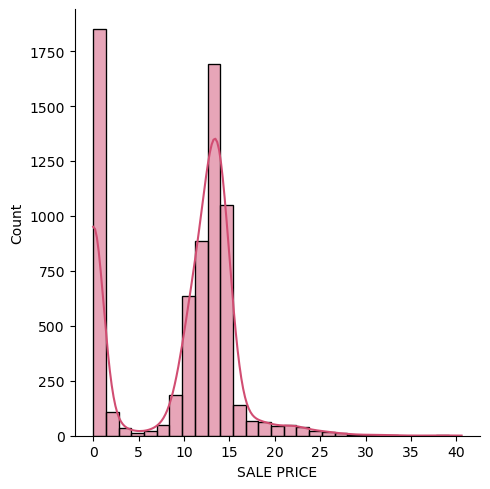

In [72]:
bronx_dist = df[df['BOROUGH'] == 'Bronx']['SALE PRICE']

sns.displot(bronx_dist**0.20, kde=True, color="#D14D72")

### Confidence Interval

Berapakah interval kepercayaan bahwa proporsi rata-rata harga jual dapat mewakili harga jual sebenarnya ?

In [8]:
mean_mht = 2919586 # rata-rata harga properti di Manhatan
sd_mht = 21527570 # standar deviasi harga properti di Manhattan
n = 18102 # jumlah properti di Manhattan
z = 1.96 # z-score berdasarkan tabel z
se = sd_mht / np.sqrt(n) # menghitung standart eror

# menghitung interval kepercayaan
lower = mean_mht - z*se
upper = mean_mht + z*se
print("(",lower,",",upper,")")

( 2605977.5173839475 , 3233194.4826160525 )


Berdasarkan hasil tersebut diperoleh bahwa rata-rata harga properti di Manhattan adalah antara 2605977.5173839475 dan 3233194.4826160525

### Hypothesis Testing



Apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2009-2014 dan properti yang dibangun sebelum tahun 2008?

Significance level (alpha) : 5% (0.05)

Hipotesis :

H0 (Null Hypothesis) : μ1 = μ2 (tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2009-2014 dan sebelum tahun 2008)

H1 (Alternative Hypothesis) : μ1 ≠ μ2 (terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2009-2014 dan sebelum tahun 2008)


In [21]:
dx = df[['RESIDENTIAL UNITS','YEAR BUILT']]
dx.head()

,RESIDENTIAL UNITS,YEAR BUILT
0,5,1900
1,28,1900
2,16,1900
3,10,1913
4,6,1900


In [22]:
dx["YEAR BUILT"] = df["YEAR BUILT"].astype("int")
dx1 = dx[
    (dx['YEAR BUILT'] > 2009) &
    (dx['YEAR BUILT'] < 2014)]
dx1.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_9828\1797580789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["YEAR BUILT"] = df["YEAR BUILT"].astype("int")


,RESIDENTIAL UNITS,YEAR BUILT
170,1,2013
171,1,2013
495,1,2013
496,1,2013
497,1,2013


In [25]:
dx2 = dx[(dx['YEAR BUILT'] < 2008)]
dx2.head()

,RESIDENTIAL UNITS,YEAR BUILT
0,5,1900
1,28,1900
2,16,1900
3,10,1913
4,6,1900


In [24]:
n1 = len(dx1)
mu1 = dx1['RESIDENTIAL UNITS'].mean()
sd1 = dx1['RESIDENTIAL UNITS'].std()

n2 = len(dx2)
mu2 = dx2['RESIDENTIAL UNITS'].mean()
sd2 = dx2['RESIDENTIAL UNITS'].std()

sm.stats.ztest(dx1['RESIDENTIAL UNITS'], dx2['RESIDENTIAL UNITS'], alternative='two-sided')

(-0.8801455880990903, 0.3787804454642144)

Karena p-value (2.67e-36) sangat kecil, maka dapat menolak Null Hypothesis bahwa tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dengan properti yang dibangun pada tahun 2007 ke atas.

In [26]:
dx2['RESIDENTIAL UNITS']

0         5
1        28
2        16
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     0
84547     0
Name: RESIDENTIAL UNITS, Length: 77259, dtype: int64